In [1]:
import numpy as np
import pandas as pd

In [39]:
#Visualization libraries
import matplotlib.pyplot as plt 
from matplotlib import rcParams
import seaborn as sns
from plotly import tools
import plotly.graph_objs as go
from plotly.offline import iplot

%matplotlib inline

#Others
from collections import defaultdict

# **Importing the Dataset**

In [3]:
reviews = pd.read_csv('./Musical_instruments_reviews.csv')
print('Amazon Reviews for sentiment Analysis Dataset:')
reviews

Amazon Reviews for sentiment Analysis Dataset:


,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]","Not much to write about here, but it does exac...",5.0,good,1393545600,"02 28, 2014"
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",The product does exactly as it should and is q...,5.0,Jake,1363392000,"03 16, 2013"
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",The primary job of this device is to block the...,5.0,It Does The Job Well,1377648000,"08 28, 2013"
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",Nice windscreen protects my MXL mic and preven...,5.0,GOOD WINDSCREEN FOR THE MONEY,1392336000,"02 14, 2014"
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,"[0, 0]",This pop filter is great. It looks and perform...,5.0,No more pops when I record my vocals.,1392940800,"02 21, 2014"
...,...,...,...,...,...,...,...,...,...
10256,A14B2YH83ZXMPP,B00JBIVXGC,Lonnie M. Adams,"[0, 0]","Great, just as expected. Thank to all.",5.0,Five Stars,1405814400,"07 20, 2014"
10257,A1RPTVW5VEOSI,B00JBIVXGC,Michael J. Edelman,"[0, 0]",I've been thinking about trying the Nanoweb st...,5.0,"Long life, and for some players, a good econom...",1404259200,"07 2, 2014"
10258,AWCJ12KBO5VII,B00JBIVXGC,Michael L. Knapp,"[0, 0]",I have tried coated strings in the past ( incl...,4.0,Good for coated.,1405987200,"07 22, 2014"
10259,A2Z7S8B5U4PAKJ,B00JBIVXGC,"Rick Langdon ""Scriptor""","[0, 0]","Well, MADE by Elixir and DEVELOPED with Taylor...",4.0,Taylor Made,1404172800,"07 1, 2014"


In [4]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10261 entries, 0 to 10260
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   reviewerID      10261 non-null  object 
 1   asin            10261 non-null  object 
 2   reviewerName    10234 non-null  object 
 3   helpful         10261 non-null  object 
 4   reviewText      10254 non-null  object 
 5   overall         10261 non-null  float64
 6   summary         10261 non-null  object 
 7   unixReviewTime  10261 non-null  int64  
 8   reviewTime      10261 non-null  object 
dtypes: float64(1), int64(1), object(7)
memory usage: 721.6+ KB


## Dataset Attributes
Description indicated in Kaggle Dataset "https://www.kaggle.com/datasets/eswarchandt/amazon-music-reviews/data"


    This dataset has reviewer ID , User ID, Reviewer Name, Reviewer text, helpful, Summary(obtained from Reviewer text), Overall Rating on a scale 5 and Review time.

    Description of columns in the file:

    1. reviewerID - ID of the reviewer, e.g. A2SUAM1J3GNN3B
    2. asin - ID of the product, e.g. 0000013714
    3. reviewerName - name of the reviewer
    4. helpful - helpfulness rating of the review, e.g. 2/3
    5. reviewText - text of the review
    6. overall - rating of the product
    7. summary - summary of the review
    8. unixReviewTime - time of the review (unix time)
    9. reviewTime - time of the review (raw)

In [5]:
reviews.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]","Not much to write about here, but it does exac...",5.0,good,1393545600,"02 28, 2014"
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",The product does exactly as it should and is q...,5.0,Jake,1363392000,"03 16, 2013"
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",The primary job of this device is to block the...,5.0,It Does The Job Well,1377648000,"08 28, 2013"
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",Nice windscreen protects my MXL mic and preven...,5.0,GOOD WINDSCREEN FOR THE MONEY,1392336000,"02 14, 2014"
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,"[0, 0]",This pop filter is great. It looks and perform...,5.0,No more pops when I record my vocals.,1392940800,"02 21, 2014"


# Data Preprocessing

In [6]:
#Checking for null values
print('The null values in the dataset:')
reviews.isnull().sum()

The null values in the dataset:


reviewerID         0
asin               0
reviewerName      27
helpful            0
reviewText         7
overall            0
summary            0
unixReviewTime     0
reviewTime         0
dtype: int64

We are not really concerned with reviewerName. As for reviewText, since there are only a few missing values, we opt to drop them.

In [7]:
# Drop rows with null values in reviewText 
reviews = reviews.dropna(subset="reviewText")
reviews.isnull().sum()

reviewerID         0
asin               0
reviewerName      27
helpful            0
reviewText         0
overall            0
summary            0
unixReviewTime     0
reviewTime         0
dtype: int64

In [8]:
reviews[reviews.isnull().any(axis=1)]

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
41,AA5TINW2RJ195,B000068NW5,NaN,"[0, 0]",Good quality cable and sounds very good,5.0,Five Stars,1405382400,"07 15, 2014"
263,A14VAT5EAX3D9S,B0002CZSJO,NaN,"[0, 0]",It is exactly what you need in a capo! You can...,5.0,Great,1364860800,"04 2, 2013"
264,A2RVY2GDMZHH4,B0002CZSJO,NaN,"[0, 0]",Love these capos and nice that you can get the...,5.0,Always great Kyser,1356652800,"12 28, 2012"
432,A3BMYEA3J6RBVV,B0002CZVB4,NaN,"[0, 0]",Bought it as a gift. Friend loved it very much.,5.0,Friend loved it very much,1405209600,"07 13, 2014"
667,AA5TINW2RJ195,B0002D01K4,NaN,"[0, 0]",At first it look small for my guitar but it fi...,5.0,Love it!,1405382400,"07 15, 2014"
1001,A3NHUK1ISMZCFZ,B0002D0DWK,NaN,"[0, 0]",The best buy for your bass drum,5.0,Five Stars,1405814400,"07 20, 2014"
2197,A3NK6WKA7GKRZS,B0002FOBJY,NaN,"[0, 0]",Classic design. I remember these from 35 year...,5.0,Excellent music stand,1385510400,"11 27, 2013"
2233,A2T8JRVJRVNX8R,B0002GJ6FC,NaN,"[0, 0]",This headstand works like a charm. It's simple...,5.0,Best overall value,1405209600,"07 13, 2014"
2591,AA5TINW2RJ195,B0002GXV2Q,NaN,"[0, 0]","Good short cable, plugs easy",4.0,Four Stars,1405382400,"07 15, 2014"
3962,A3NHUK1ISMZCFZ,B0009EU01G,NaN,"[0, 0]",They say there the best there not wrong wool a...,5.0,Five Stars,1405814400,"07 20, 2014"


## Feature Engineering

### 'reviewText' + 'summary' --> 'reviews'

To only look at one piece of text, let us combine 'reviewText' and 'summary', with the assumption that the summary is indeed the summary of the 'reviewText' column, and so reflects the same sentiment.

In [9]:
reviews['reviews'] = reviews['reviewText'] + " " + reviews['summary']

# Remove 'reviewText' and 'summary' to simplify data
reviews = reviews.drop(['reviewText', 'summary'], axis=1)
reviews.head()

C:\Users\Leibniz\AppData\Local\Temp\ipykernel_35364\1530590027.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviews['reviews'] = reviews['reviewText'] + " " + reviews['summary']


,reviewerID,asin,reviewerName,helpful,overall,unixReviewTime,reviewTime,reviews
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]",5.0,1393545600,"02 28, 2014","Not much to write about here, but it does exac..."
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",5.0,1363392000,"03 16, 2013",The product does exactly as it should and is q...
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",5.0,1377648000,"08 28, 2013",The primary job of this device is to block the...
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",5.0,1392336000,"02 14, 2014",Nice windscreen protects my MXL mic and preven...
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,"[0, 0]",5.0,1392940800,"02 21, 2014",This pop filter is great. It looks and perform...


### Objective 'Sentiment'

In [10]:
print('The distribution of categories of sentiment:') 
reviews['overall'].value_counts()

The distribution of categories of sentiment:


5.0    6932
4.0    2083
3.0     772
2.0     250
1.0     217
Name: overall, dtype: int64

In [11]:
def sent(rating):
    if rating['overall'] == 3:
        value = 'Neutral'
    elif rating['overall'] > 3:
        value = 'Positive'
    else:
        value = 'Negative'
    return value

In [12]:
#Applying the function in our new column
reviews['Sentiment'] = reviews.apply(sent, axis=1)
reviews.head()

,reviewerID,asin,reviewerName,helpful,overall,unixReviewTime,reviewTime,reviews,Sentiment
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]",5.0,1393545600,"02 28, 2014","Not much to write about here, but it does exac...",Positive
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",5.0,1363392000,"03 16, 2013",The product does exactly as it should and is q...,Positive
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",5.0,1377648000,"08 28, 2013",The primary job of this device is to block the...,Positive
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",5.0,1392336000,"02 14, 2014",Nice windscreen protects my MXL mic and preven...,Positive
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,"[0, 0]",5.0,1392940800,"02 21, 2014",This pop filter is great. It looks and perform...,Positive


In [13]:
print('The count of sentiments:')
reviews['Sentiment'].value_counts()

The count of sentiments:


Positive    9015
Neutral      772
Negative     467
Name: Sentiment, dtype: int64

### Date

In [14]:
# Splitting the date 
re_date = reviews["reviewTime"].str.split(" ", expand = True)  

reviews["month"] = re_date[0] 
reviews["day"] = re_date[1].str[:-1] #since month has comma
reviews["year"] = re_date[2]

reviews = reviews.drop(['reviewTime'], axis=1)
reviews.head() 

,reviewerID,asin,reviewerName,helpful,overall,unixReviewTime,reviews,Sentiment,month,day,year
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]",5.0,1393545600,"Not much to write about here, but it does exac...",Positive,02,28,2014
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",5.0,1363392000,The product does exactly as it should and is q...,Positive,03,16,2013
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",5.0,1377648000,The primary job of this device is to block the...,Positive,08,28,2013
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",5.0,1392336000,Nice windscreen protects my MXL mic and preven...,Positive,02,14,2014
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,"[0, 0]",5.0,1392940800,This pop filter is great. It looks and perform...,Positive,02,21,2014


In [15]:
reviews['year'].value_counts()

2013    4053
2014    2679
2012    1933
2011    1006
2010     350
2009     127
2008      63
2007      22
2006      10
2004       7
2005       4
Name: year, dtype: int64

In [16]:
reviews.groupby(['year', 'Sentiment']).size()

year  Sentiment
2004  Positive        7
2005  Positive        4
2006  Negative        1
      Neutral         1
      Positive        8
2007  Negative        1
      Positive       21
2008  Negative        2
      Neutral         7
      Positive       54
2009  Negative        5
      Neutral         8
      Positive      114
2010  Negative       16
      Neutral        20
      Positive      314
2011  Negative       46
      Neutral        84
      Positive      876
2012  Negative       85
      Neutral       130
      Positive     1718
2013  Negative      170
      Neutral       319
      Positive     3564
2014  Negative      141
      Neutral       203
      Positive     2335
dtype: int64

### 'helpful' --> 'helpful_review'

Converted 'helpful' to a much more workable value, that is ratio ranging from 0 to 1 or least helpful (or no data) to most helpful.

In [17]:
re_review = reviews["helpful"].str[1:-1].str.split(",", expand=True)
reviews["helpful_count"] = pd.to_numeric(re_review[0])
reviews["total_count"] = pd.to_numeric(re_review[1])
reviews.head()

,reviewerID,asin,reviewerName,helpful,overall,unixReviewTime,reviews,Sentiment,month,day,year,helpful_count,total_count
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]",5.0,1393545600,"Not much to write about here, but it does exac...",Positive,02,28,2014,0,0
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",5.0,1363392000,The product does exactly as it should and is q...,Positive,03,16,2013,13,14
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",5.0,1377648000,The primary job of this device is to block the...,Positive,08,28,2013,1,1
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",5.0,1392336000,Nice windscreen protects my MXL mic and preven...,Positive,02,14,2014,0,0
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,"[0, 0]",5.0,1392940800,This pop filter is great. It looks and perform...,Positive,02,21,2014,0,0


In [18]:
reviews["helpful_review"] = np.where(reviews["total_count"] !=0, reviews["helpful_count"] / reviews["total_count"], 0).round(2)
reviews = reviews.drop(['helpful', 'helpful_count'], axis=1)
reviews.head()

,reviewerID,asin,reviewerName,overall,unixReviewTime,reviews,Sentiment,month,day,year,total_count,helpful_review
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...",5.0,1393545600,"Not much to write about here, but it does exac...",Positive,02,28,2014,0,0.00
1,A14VAT5EAX3D9S,1384719342,Jake,5.0,1363392000,The product does exactly as it should and is q...,Positive,03,16,2013,14,0.93
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""",5.0,1377648000,The primary job of this device is to block the...,Positive,08,28,2013,1,1.00
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""",5.0,1392336000,Nice windscreen protects my MXL mic and preven...,Positive,02,14,2014,0,0.00
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,5.0,1392940800,This pop filter is great. It looks and perform...,Positive,02,21,2014,0,0.00


In [19]:
reviews["total_count"].value_counts()

0      6796
1      1492
2       654
3       331
4       227
       ... 
136       1
114       1
77        1
82        1
68        1
Name: total_count, Length: 88, dtype: int64

In [20]:
reviews['helpful_review'].value_counts()

0.00    7215
1.00    2037
0.50     266
0.67     136
0.75     111
        ... 
0.56       1
0.15       1
0.13       1
0.43       1
0.69       1
Name: helpful_review, Length: 65, dtype: int64

### Removing columns

In [21]:
reviews = reviews.drop(['reviewerName','unixReviewTime'], axis=1)
reviews.head()

,reviewerID,asin,overall,reviews,Sentiment,month,day,year,total_count,helpful_review
0,A2IBPI20UZIR0U,1384719342,5.0,"Not much to write about here, but it does exac...",Positive,02,28,2014,0,0.00
1,A14VAT5EAX3D9S,1384719342,5.0,The product does exactly as it should and is q...,Positive,03,16,2013,14,0.93
2,A195EZSQDW3E21,1384719342,5.0,The primary job of this device is to block the...,Positive,08,28,2013,1,1.00
3,A2C00NNG1ZQQG2,1384719342,5.0,Nice windscreen protects my MXL mic and preven...,Positive,02,14,2014,0,0.00
4,A94QU4C90B1AX,1384719342,5.0,This pop filter is great. It looks and perform...,Positive,02,21,2014,0,0.00


### Add review_len and word_count

In [22]:
reviews['review_len'] = reviews['reviews'].astype(str).apply(len)
reviews['word_count'] = reviews['reviews'].apply(lambda x: len(str(x).split()))
reviews.head()

,reviewerID,asin,overall,reviews,Sentiment,month,day,year,total_count,helpful_review,review_len,word_count
0,A2IBPI20UZIR0U,1384719342,5.0,"Not much to write about here, but it does exac...",Positive,02,28,2014,0,0.00,273,52
1,A14VAT5EAX3D9S,1384719342,5.0,The product does exactly as it should and is q...,Positive,03,16,2013,14,0.93,549,105
2,A195EZSQDW3E21,1384719342,5.0,The primary job of this device is to block the...,Positive,08,28,2013,1,1.00,457,82
3,A2C00NNG1ZQQG2,1384719342,5.0,Nice windscreen protects my MXL mic and preven...,Positive,02,14,2014,0,0.00,236,40
4,A94QU4C90B1AX,1384719342,5.0,This pop filter is great. It looks and perform...,Positive,02,21,2014,0,0.00,197,36


# Initial EDA

## Sentiment vs Helpful Review

We can see that once we adjust the mean, that customers find positive reviews the most helpful, followed by neutral and negative. The positive reviews also seem to be found as consistently helpful whereas neutral and negative reviews can vary widely.

In [25]:
pd.DataFrame(reviews.groupby('Sentiment')['helpful_review'].mean())

,helpful_review
Sentiment,
Negative,0.307559
Neutral,0.275687
Positive,0.259947


In [26]:
# Adjusted mean (removing those with 0 reviews from average as they have helpful_review = 0)
pd.DataFrame(reviews[reviews['total_count']!=0].groupby('Sentiment')['helpful_review'].mean())

,helpful_review
Sentiment,
Negative,0.493574
Neutral,0.606353
Positive,0.832180


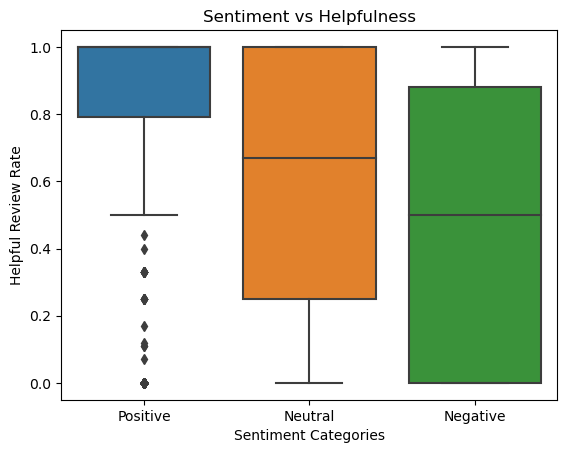

In [27]:
sns.boxplot(x = reviews["Sentiment"], y=reviews[reviews['total_count']!=0]["helpful_review"])
plt.title('Sentiment vs Helpfulness')
plt.xlabel('Sentiment Categories')
plt.ylabel('Helpful Review Rate')
plt.show()

## Sentiment vs Date

Data is skewed towards the years 2010 and above. However, with regards to days, reviews are all in all uniformly distributed.

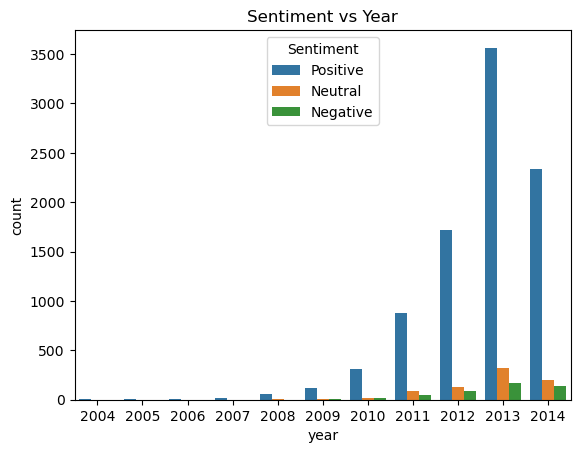

In [28]:
# Sentiment by Year 
year_order = sorted(reviews['year'].unique(), key = lambda x: int(x))
sns.countplot(x='year', hue='Sentiment', data=reviews, order=year_order)
plt.title('Sentiment vs Year')
plt.show()

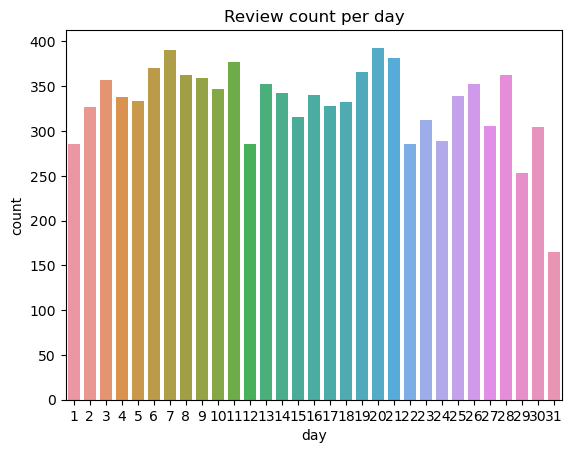

In [29]:
# Reviews per day
day_order = sorted(reviews['day'].unique(), key = lambda x: int(x))
sns.countplot(x='day', data=reviews, order=day_order)
plt.title('Review count per day')
plt.show()

## Sentiment vs Review Length / Word Count

There is no significant difference between sentiments regarding these features.

<AxesSubplot:xlabel='Sentiment', ylabel='review_len'>

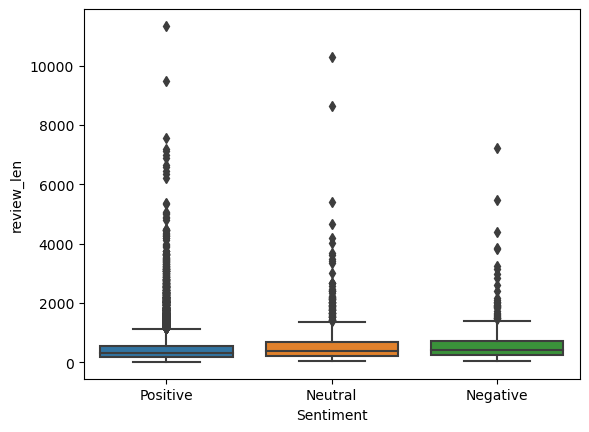

In [30]:
sns.boxplot(x="Sentiment", y="review_len", data=reviews)

<AxesSubplot:xlabel='Sentiment', ylabel='word_count'>

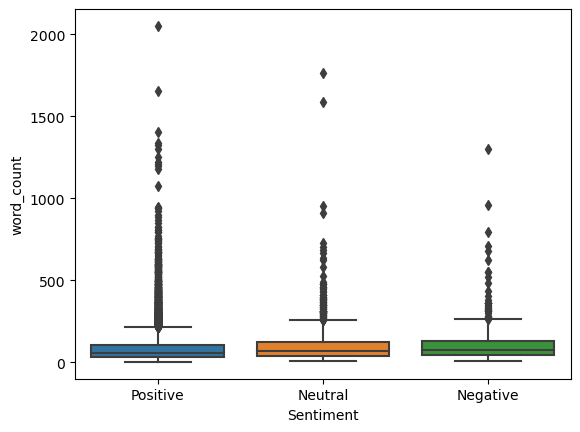

In [31]:
sns.boxplot(x="Sentiment", y="word_count", data=reviews)

## Per Product

In [32]:
total_per_product = reviews.groupby('asin')['Sentiment'].size()
sentiment_pct = reviews.groupby(['asin', 'Sentiment']).size() / total_per_product

In [33]:
# Bad Products
bad_sentiment_pct = sentiment_pct[(sentiment_pct.index.get_level_values('Sentiment') == 'Negative') & (sentiment_pct > 0.25)]
print(bad_sentiment_pct)

print("Products with considerable negative reviews")
print(bad_sentiment_pct.index.get_level_values('asin'))

asin        Sentiment
B0002E37MM  Negative     0.400000
B0002E3MRW  Negative     0.400000
B0002GX5NG  Negative     0.272727
B0002H0SKS  Negative     0.400000
B0002KYXTM  Negative     0.285714
B0002KZEMC  Negative     0.272727
B0002Z2D08  Negative     0.428571
B0002ZO3LK  Negative     0.285714
B0007L8BQW  Negative     0.428571
B000A2HDXA  Negative     0.272727
B000CHJTG2  Negative     0.400000
B000OY4WDI  Negative     0.333333
B000ZJTPLG  Negative     0.571429
B0014IEBM0  Negative     0.428571
B001E43SK0  Negative     0.400000
B001GD07SK  Negative     0.375000
B001LJUVO4  Negative     0.375000
B001UJEKZ6  Negative     0.333333
B0025V1REU  Negative     0.428571
B0027V760M  Negative     0.272727
B002C741B8  Negative     0.333333
B002HJ61PK  Negative     0.333333
B002IC1D5E  Negative     0.333333
B003AM913C  Negative     0.400000
B003KQY8DQ  Negative     0.333333
B003QTM9O2  Negative     0.400000
B003W47NII  Negative     0.272727
B00466HM28  Negative     0.428571
B004Z8VQ2O  Negative     0

In [34]:
# Good Products
good_sentiment_pct = sentiment_pct[(sentiment_pct.index.get_level_values('Sentiment') == 'Positive') & (sentiment_pct > 0.75)]
print(good_sentiment_pct)

print("Products with great positive reviews")
print(good_sentiment_pct.index.get_level_values('asin'))

asin        Sentiment
1384719342  Positive     1.000000
B00004Y2UT  Positive     0.833333
B000068NSX  Positive     1.000000
B000068NTU  Positive     1.000000
B000068NVI  Positive     1.000000
                           ...   
B00H02C9TG  Positive     1.000000
B00HFRXACG  Positive     1.000000
B00IZCSW3M  Positive     0.958333
B00J4TBMVO  Positive     0.875000
B00JBIVXGC  Positive     0.923077
Length: 736, dtype: float64
Products with great positive reviews
Index(['1384719342', 'B00004Y2UT', 'B000068NSX', 'B000068NTU', 'B000068NVI',
       'B000068NW5', 'B000068NZG', 'B000068O1N', 'B000068O3D', 'B000068O3X',
       ...
       'B00EIMZG46', 'B00EPWAQS0', 'B00EQDITGO', 'B00F2PKRJW', 'B00GTSM8FW',
       'B00H02C9TG', 'B00HFRXACG', 'B00IZCSW3M', 'B00J4TBMVO', 'B00JBIVXGC'],
      dtype='object', name='asin', length=736)


# Model Building

## n-gram Analysis

In [41]:
stop_words= ['yourselves', 'between', 'whom', 'itself', 'is', "she's", 'up', 'herself', 'here', 'your', 'each', 
             'we', 'he', 'my', "you've", 'having', 'in', 'both', 'for', 'themselves', 'are', 'them', 'other',
             'and', 'an', 'during', 'their', 'can', 'yourself', 'she', 'until', 'so', 'these', 'ours', 'above', 
             'what', 'while', 'have', 're', 'more', 'only', "needn't", 'when', 'just', 'that', 'were', "don't", 
             'very', 'should', 'any', 'y', 'isn', 'who',  'a', 'they', 'to', 'too', "should've", 'has', 'before',
             'into', 'yours', "it's", 'do', 'against', 'on',  'now', 'her', 've', 'd', 'by', 'am', 'from', 
             'about', 'further', "that'll", "you'd", 'you', 'as', 'how', 'been', 'the', 'or', 'doing', 'such',
             'his', 'himself', 'ourselves',  'was', 'through', 'out', 'below', 'own', 'myself', 'theirs', 
             'me', 'why', 'once',  'him', 'than', 'be', 'most', "you'll", 'same', 'some', 'with', 'few', 'it',
             'at', 'after', 'its', 'which', 'there','our', 'this', 'hers', 'being', 'did', 'of', 'had', 'under',
             'over','again', 'where', 'those', 'then', "you're", 'i', 'because', 'does', 'all']

In [42]:
#Filtering data
positive_review = reviews[reviews["Sentiment"]=='Positive'].dropna()
neutral_review = reviews[reviews["Sentiment"]=='Neutral'].dropna()
negative_review = reviews[reviews["Sentiment"]=='Negative'].dropna()

## custom function for ngram generation ##
def generate_ngrams(text, n_gram = 1):
    token = [token for token in text.lower().split(" ") if token != "" if token not in stop_words]
    ngrams = zip(*[token[i:] for i in range(n_gram)])
    return [" ".join(ngram) for ngram in ngrams]

In [43]:
negative_review

,reviewerID,asin,overall,reviews,Sentiment,month,day,year,total_count,helpful_review,review_len,word_count
15,A2PD27UKAD3Q00,B00005ML71,2.0,I bought this to use with my keyboard. I wasn'...,Negative,08,17,2013,0,0.0,668,122
50,A12ABV9NU02O29,B000068NW5,2.0,I didn't expect this cable to be so thin. It's...,Negative,07,6,2011,2,1.0,404,71
52,A1L7M2JXN4EZCR,B000068NW5,1.0,"It hums, crackles, and I think I'm having prob...",Negative,02,9,2014,0,0.0,323,62
89,A3UD50M7M72150,B000068NW5,1.0,I'm a pro-cheapo and I hated this thing. They'...,Negative,03,14,2014,0,0.0,150,26
98,A1W3CEEQBJ4GTN,B000068NZC,2.0,I bought this for my Canon Vixia HF G10 Video ...,Negative,09,16,2013,0,0.0,1023,196
...,...,...,...,...,...,...,...,...,...,...,...,...
10171,A2Y2U697SS98E1,B00F2PKRJW,1.0,"I really wanted to like these, but they're a f...",Negative,06,12,2014,1,0.0,336,63
10178,A768OB1LNE356,B00FXKIG5I,2.0,The larger ones sometimes have the neck snap s...,Negative,03,22,2014,2,0.5,445,86
10187,A3AOPVQ7EZHTWA,B00GTSM8FW,2.0,The tension screw adjustment remains the best ...,Negative,04,24,2014,0,0.0,2155,380
10189,A1SD1C8XK3Z3V1,B00GTSM8FW,2.0,"I am a fan of Planet Waves NS capos, but this ...",Negative,06,2,2014,1,1.0,528,106


In [44]:
# custom function for horizontal bar chart ##
def horizontal_bar_chart(df, color):
    trace = go.Bar(
        y =df["word"].values[::-1],
        x = df["wordcount"].values[::-1],
        showlegend = False,
        orientation = 'h',
        marker = dict(
            color = color,
        ),
    )
    return trace

In [45]:
## Get the bar chart from positive reviews ##
freq_dict = defaultdict(int)
for sent in positive_review["reviews"]:
    for word in generate_ngrams(sent):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace0 = horizontal_bar_chart(fd_sorted.head(20), 'blue')


## Get the bar chart from neutral reviews ##
freq_dict = defaultdict(int)
for sent in neutral_review["reviews"]:
    for word in generate_ngrams(sent):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace1 = horizontal_bar_chart(fd_sorted.head(20), 'purple')

NameError: name 'go' is not defined

In [ ]:
## Get the bar chart from negative reviews ##
freq_dict = defaultdict(int)
for sent in negative_review["reviews"]:
    for word in generate_ngrams(sent):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace2 = horizontal_bar_chart(fd_sorted.head(20), 'yellow')

In [ ]:
# Creating two subplots
fig = tools.make_subplots(rows=3, cols=1, vertical_spacing = 0.04,
                          subplot_titles=["Frequent words of positive reviews", "Frequent words of neutral reviews",
                                          "Frequent words of negative reviews"])
fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 2, 1)
fig.append_trace(trace2, 3, 1)
fig['layout'].update(height=1200, width=900, paper_bgcolor='rgb(233,233,233)', title="Word Count Plots")
iplot(fig, filename='word-plots')

With ngram, not much information is gathered for sentiments based on one word.

### n > 1

In [ ]:
## Get the bar chart from positive reviews ##
freq_dict = defaultdict(int)
for sent in positive_review["reviews"]:
    for word in generate_ngrams(sent, 2):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace0 = horizontal_bar_chart(fd_sorted.head(20), 'blue')


## Get the bar chart from neutral reviews ##
freq_dict = defaultdict(int)
for sent in neutral_review["reviews"]:
    for word in generate_ngrams(sent, 2):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace1 = horizontal_bar_chart(fd_sorted.head(20), 'purple')


## Get the bar chart from negative reviews ##
freq_dict = defaultdict(int)
for sent in negative_review["reviews"]:
    for word in generate_ngrams(sent, 2):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace2 = horizontal_bar_chart(fd_sorted.head(20), 'yellow')

In [ ]:
# Creating two subplots
fig = tools.make_subplots(rows=3, cols=1, vertical_spacing = 0.04,
                          subplot_titles=["Frequent words of positive reviews", "Frequent words of neutral reviews",
                                          "Frequent words of negative reviews"])
fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 2, 1)
fig.append_trace(trace2, 3, 1)
fig['layout'].update(height=1200, width=900, paper_bgcolor='rgb(233,233,233)', title="Word Count Plots")
iplot(fig, filename='word-plots')

In bigram (n = 2) analysis, where there are two words, somehow justify the sentiment categories.

In [ ]:
## Get the bar chart from positive reviews ##
freq_dict = defaultdict(int)
for sent in positive_review["reviews"]:
    for word in generate_ngrams(sent, 3):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace0 = horizontal_bar_chart(fd_sorted.head(20), 'blue')


## Get the bar chart from neutral reviews ##
freq_dict = defaultdict(int)
for sent in neutral_review["reviews"]:
    for word in generate_ngrams(sent, 3):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace1 = horizontal_bar_chart(fd_sorted.head(20), 'purple')


## Get the bar chart from negative reviews ##
freq_dict = defaultdict(int)
for sent in negative_review["reviews"]:
    for word in generate_ngrams(sent, 3):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace2 = horizontal_bar_chart(fd_sorted.head(20), 'yellow')

In [ ]:
# Creating two subplots
fig = tools.make_subplots(rows=3, cols=1, vertical_spacing = 0.04,
                          subplot_titles=["Frequent words of positive reviews", "Frequent words of neutral reviews",
                                          "Frequent words of negative reviews"])
fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 2, 1)
fig.append_trace(trace2, 3, 1)
fig['layout'].update(height=1200, width=900, paper_bgcolor='rgb(233,233,233)', title="Word Count Plots")
iplot(fig, filename='word-plots')